# Exploring the No-show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from over 100k medical appointments in brazil and is focused on the question whether a patient shows up for his/her appointment or not.
The dataset contains fourteen(14) columns, which are:
- PatientId: a unique id for every patient.
- AppointmentID: a unique id for each appointment made by each patient.
- Gender: It has two(2) values of Male(M) and Female(F).
- AppointmentDay: The day of the actual appointment, when they have to visit the doctor.
- ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
- Age: How old is the patient.
- Neighbourhood: Where the appointment takes place.
- Scholarship: Two values of either True of False, indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Hipertension: True or False.
- Diabetes: True or False.
- Alcoholism: True or False.
- Handcap: True or False.
- SMS_received: either 1 or . 1 stating A patient recieved and 0 stating a patient didnt recieve.
- No-show: True (if the patient did not show up), or False (if the patient did show up).

EDA Questions

- Question 1: What is the relationship between Patient's Gender and missing appointment?
- Question 2: What is the relationship between age of patients and missing appointments?
- Question 3: Does the likehood of recieving sms affect number of No_Show?
- Question 4: What relationship does having a scholarship have with a patient not missing appointment?
- Question 5: What are the top 10 neighbourhoods with the highest percentage of No-Show?
- Question 6:  What are the top 10 neighbourhoods with the highest percentage of Patients that showed up?

<a id='wrangling'></a>
## Data Wrangling

In [3]:
#importing the required library needed through out this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset
df = pd.read_csv('noshowappointments.csv')

In [5]:
#Viewing the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#checking the dimension of the dataset
df.shape

(110527, 14)

The above code indicates that there are 110527 samples of data and 14 columns

In [7]:
# Checking the summary of statistics for the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- The above code shows that the maximum age of a patient is 115 years old. Compare to the 75 percentile which has an age of 55 years. This seems like an outlier to me and the minimum age is -1 which can't be so.
- Average age of the patients is 37years.
- The numbers of patients suffering from Hypertension, Diabetes, Alcoholism and being handicapped are not that much. 
- It was discovered there is a negative value under the column 'Age' which is not suppose to be so. That row therefore would be dropped.

In [8]:
#Checking for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the above code, we can see that there are no missing value in our dataset

In [9]:
#Checking the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- The number of unique appointments is greater than patients; this simply indicates some patients have more than one appointment.
- There are five(5) values in the Handicap column, whereas it is suppose to be two(2); which should be 0 and 1 or Yes and no depending on the data type.

In [10]:
#Checking if there is duplicate in the dataset
df.duplicated().sum()

0

The above code shows there are no duplicated row in the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- It was discovered that ScheduledDay and AppointmentDay need to be convert to DayTime Data type.
- Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, Sms_recieved are in data type 'int' and no show is a string. These columns will be converted to boolean

In [12]:
#Checking handcap value
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

It is discovered we have more than two unique values for handcap column. We will only work with rows with value of 0 and 1, and rows with value greater than 1 would be dropped

### Data Cleaning 

In [13]:
#Viewing rows with values of handicap greater than 1
wrong_Handicap = df[df['Handcap'] > 1]
wrong_Handicap

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [14]:
#dropping the rows with Handcap value greater than 1 with 1
df.drop(wrong_Handicap.index, inplace =True)

In [15]:
#Checking for changes effected above
df[df['Handcap'] > 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [16]:
#Changing datatype for Column 'Handcap' from int to boolean
df['Handcap'] = df['Handcap'].astype('bool')

In [17]:
#Confirm the changes effected above
df['Handcap'].unique()

array([False,  True])

In [18]:
#Renaming the Handcap column to Handicap
df.rename(columns={'Handcap': 'Handicap'}, inplace=True)

In [19]:
# Dropping the "PatientId" and "AppointmentID" columns cos they are not needed for any analysis
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace =True)

In [20]:
#Confirm the drop column changes
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,False,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,False,0,No


In [21]:
# Dropping the column with negative age
df.drop(df[df['Age'] < 0].index, inplace = True)

In [22]:
# Confirming the changes
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


In [23]:
#Checking the data type of 'AppointmentDay' column
df.AppointmentDay.unique

<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110327, dtype: object>

From the above code, It is deduced that while patient have different appointment days, there was no particular time given to each patients.

In [24]:
#Checking the data type of 'ScheduleDay' column
df.ScheduledDay.unique

<bound method Series.unique of 0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: ScheduledDay, Length: 110327, dtype: object>

Although the time each patient sheduled their appointment differs but it has no relevant on our analysis. There we would also be extracting only the day, month and year, the same way we did for 'ApointmentDay' column

#### Extracting Day, Month and Year from the 'AppointmentDay' and 'SheduledDay' Column

In [25]:
#Extracting Day, Month and Year from the 'AppointmentDay' Column
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

#Extracting Day, Month and Year from the 'ScheduledDay' Column
df['ScheduledDay'] = df['ScheduledDay'].str[:10]

#### Changing the data type of 'AppointmentDay' and 'ScheduledDay' column 


In [26]:
# Changing the data type of 'AppointmentDay' column
df['AppointmentDay'] =pd.to_datetime(df['AppointmentDay'])

# Changing the data type of 'ScheduledDay' column
df['ScheduledDay'] =pd.to_datetime(df['ScheduledDay'])

#### Confirming the changes made for 'AppointmentDay' and 'ScheduledDay' column

In [27]:
# Confirming the changes made for 'AppointmentDay' column
print(df['AppointmentDay'].dtypes)

# Confirming the changes made for 'ScheduledDay' column
print(df['ScheduledDay'].dtypes)

datetime64[ns]
datetime64[ns]


In [28]:
#Lets check for invalid appointments
Invalid_Appt = df[df['AppointmentDay'] < df['ScheduledDay']]
print(Invalid_Appt)

      Gender ScheduledDay AppointmentDay  Age  Neighbourhood  Scholarship  \
27033      M   2016-05-10     2016-05-09   38    RESISTÊNCIA            0   
55226      F   2016-05-18     2016-05-17   19  SANTO ANTÔNIO            0   
64175      F   2016-05-05     2016-05-04   22     CONSOLAÇÃO            0   
71533      F   2016-05-11     2016-05-05   81  SANTO ANTÔNIO            0   
72362      M   2016-05-04     2016-05-03    7     TABUAZEIRO            0   

       Hipertension  Diabetes  Alcoholism  Handicap  SMS_received No-show  
27033             0         0           0      True             0     Yes  
55226             0         0           0      True             0     Yes  
64175             0         0           0     False             0     Yes  
71533             0         0           0     False             0     Yes  
72362             0         0           0     False             0     Yes  


In [29]:
#Lets drop the invalid apppointment
df.drop(Invalid_Appt.index, inplace = True)

In [30]:
df.shape

(110322, 12)

#### Rename ScheduledDay, AppointmentDay, Hipertension and No-show

In [31]:
#Renaming 'SheduledDay' column
df.rename(columns={'ScheduledDay': 'Scheduled_Day'}, inplace=True)

In [32]:
#Renaming 'AppointmentDay' column
df.rename(columns={'AppointmentDay': 'Appointment_Day'}, inplace=True)

In [33]:
#Renaming 'Hipertension' column
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

In [34]:
#Renaming 'No-show' column
df.rename(columns = {'No-show': 'No_Show'}, inplace = True)

In [35]:
#Converting Scholarship, Hipertension, Diabetes, Alcoholism and Handcap column and SMS_recieved columns to boolean data type for easy understanding.
columns = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']
df[columns] = df[columns].astype('bool')

In [36]:
#Confirming the changes
df[columns].dtypes

Scholarship     bool
Hypertension    bool
Diabetes        bool
Alcoholism      bool
Handicap        bool
SMS_received    bool
dtype: object

In [37]:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No


In [38]:
df.shape

(110322, 12)

### The histogram of all the data

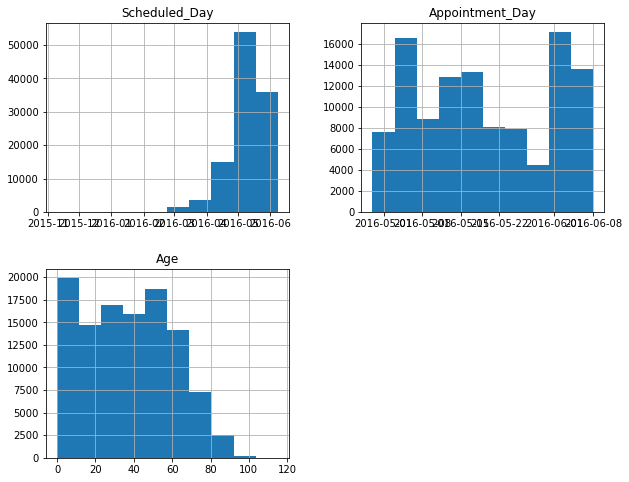

In [39]:
#Plotting the histogram for each column
df.hist(figsize =(10, 8));

<a id='eda'></a>
## Exploratory Data Analysis

In [66]:
def val(variable):
    d_counts = df[variable].value_counts()
    df_1 = d_counts.plot(kind = 'bar', subplots = True)
    plt.title("Gender Distribution of the Patients")
    plt.xlabel("{}".format(variable))
    plt.ylabel("Number of Patients")
    return df_1


array([<AxesSubplot:title={'center':'Gender Distribution of the Patients'}, xlabel='Gender', ylabel='Number of Patients'>],
      dtype=object)

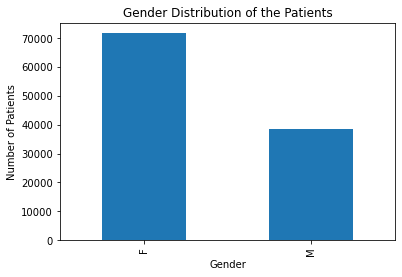

In [68]:
# viewing the gender distribution in our dataset
val('Gender')

- From the histogram above, there are more female patients than male patients

### Question 1:What is the relationship between Patient's Gender and missing appointment?

In [43]:
# Total number of female patients
No_Of_Female_Patients = df.query('Gender == "F"').count()['Age']
No_Of_Female_Patients

71727

In [44]:
#Total number of Male patients
No_of_Male_Patients = df.query('Gender == "M"').count()['Age']
No_of_Male_Patients

38595

Getting the number of Absentee Patients by Gender

In [45]:
df_noshow = df[df['No_Show'] == "Yes"]
df_noshow

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,Yes
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,Yes
11,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,False,False,False,False,False,True,Yes
17,F,2016-04-28,2016-04-29,40,CONQUISTA,True,False,False,False,False,False,Yes
20,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,False,False,False,False,False,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03,2016-06-07,45,BARRO VERMELHO,False,False,False,False,False,False,Yes
110492,M,2016-06-08,2016-06-08,33,MARIA ORTIZ,False,True,False,False,False,False,Yes
110496,F,2016-06-06,2016-06-08,37,MARIA ORTIZ,False,True,False,False,False,False,Yes
110515,M,2016-06-06,2016-06-08,33,MARIA ORTIZ,False,True,False,False,False,False,Yes


In [46]:
df_show = df[df['No_Show'] == "No"]
df_show 

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,No
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,No
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,No
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,No


In [47]:
#Number of female absentees
Female_NoShow = df_noshow.query('Gender == "F"').count()['Age']
Female_NoShow 

14565

In [48]:
#Number of Male absentees
df_noshow = df[df['No_Show'] == "Yes"]
Male_Noshow = df_noshow.query('Gender == "M"').count()['Age']
Male_Noshow

7708

In [49]:
#Female absentees proportion
Female_NoShow_Prop = Female_NoShow/No_Of_Female_Patients
Female_NoShow_Prop

0.20306160859927225

In [50]:
#Male absentees proportion
Male_NoShow_Prop = Male_Noshow/No_of_Male_Patients
Male_NoShow_Prop

0.1997149889882109

Text(0, 0.5, 'No-show Poportion')

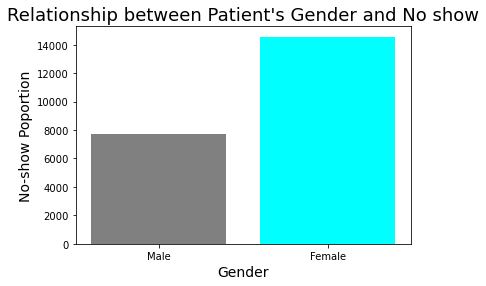

In [51]:
Locations = [1, 2]
Labels = ['Male', 'Female']
Heights = [Male_Noshow, Female_NoShow]
plt.bar(Locations, Heights, tick_label = Labels, color = ['grey', 'cyan'])
plt.title("Relationship between Patient's Gender and No show", fontsize=18)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("No-show Poportion", fontsize=14)

- Out of the 71727 female patients, 14565 failed to show for their appointments
- Out of the 38595 male paiients, 7728 missed their appointments

Text(0, 0.5, 'No show Poportion')

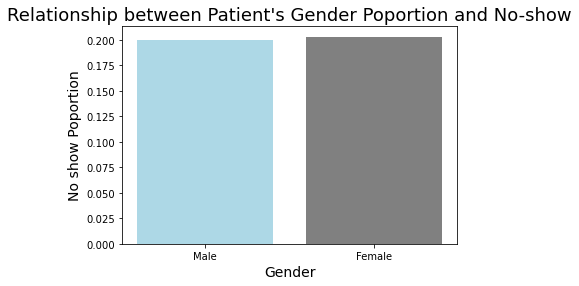

In [52]:
Locations = [1, 2]
Labels = ['Male', 'Female']
Heights = [Male_NoShow_Prop, Female_NoShow_Prop]
plt.bar(Locations, Heights, tick_label = Labels, color = ['lightblue', 'grey'])
plt.title("Relationship between Patient's Gender Poportion and No-show", fontsize=18)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("No show Poportion", fontsize=14)

- While the female has more absentee patients than thec male, we can conclude from the above histogram that the absentee of the male compare to the female is almost of equal proportion in respewct to the total number of each gender

### Question 2: What is the relationship between age of patients and missing appointments?

In [53]:
df_noshow.Age.value_counts()

0      639
1      415
17     396
19     393
30     369
      ... 
95       6
115      3
97       2
98       1
96       1
Name: Age, Length: 100, dtype: int64

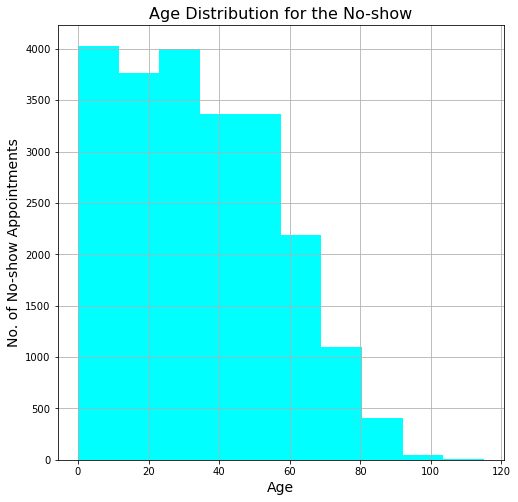

In [54]:
df_noshow.hist(column='Age', figsize=(8, 8), color='cyan')
plt.title("Age Distribution for the No-show", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel('No. of No-show Appointments', fontsize=14);

- This is very skewed to the right, indicating that most of the patients that missed appointments are between the ages of 0-60 years

### Question 3: Does the likehood of recieving sms affect number of No_Show?

In [55]:
#Checking for total sms recieved
Tot_SMS = df.query('SMS_received == True').count()['SMS_received']
Tot_SMS

35435

In [56]:
#Checking the total number of sms received by those that miss their appointments
NoShow_SMS = df_noshow.query('SMS_received == True').count()['SMS_received']
NoShow_SMS

9775

In [57]:
#Total  number of sms sent to those that showed up
ShowedUp_SMS = Tot_SMS - NoShow_SMS
ShowedUp_SMS

25660

In [58]:
#Total sample of dataset
df.shape

(110322, 12)

In [59]:
Total_Sample = 110322

Text(0.5, 1.0, 'Relationship between Patient Attendance and SMS Received')

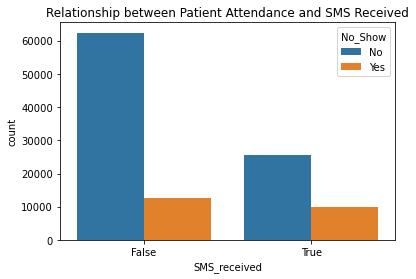

In [60]:
sns.countplot(x=df['SMS_received'], hue=df['No_Show']);
plt.title('Relationship between Patient Attendance and SMS Received')

- From the above illustration, the likelihood of receiving sms and showing up is low. The number of those that didnt receive sms but showed-up is high compare to those that received and showed-up

### Question 4: What relationship does having a scholarship have with a patient not missing appointment?

In [61]:
df.groupby('Scholarship').No_Show.value_counts(normalize = True)

Scholarship  No_Show
False        No         0.802008
             Yes        0.197992
True         No         0.762335
             Yes        0.237665
Name: No_Show, dtype: float64

Text(0.5, 1.0, 'Relationship between Patient Attendance and Scholarship')

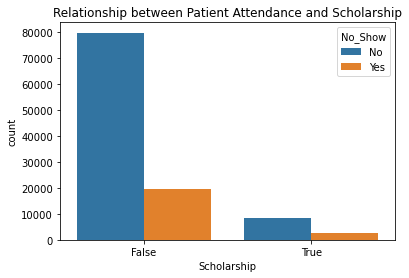

In [62]:
sns.countplot(x=df['Scholarship'], hue=df['No_Show']);
plt.title('Relationship between Patient Attendance and Scholarship')

- We can deduce from the above illustration that, sholarship doesnt affect whether a patient showed up or not. Even without scholarship, the number of those that showed up is high.

### Question 5:  What are the top 10 neighbourhoods with the highest percentage of No-Show?


In [63]:
def func(pct):
  return "{:1.1f}%".format(pct)

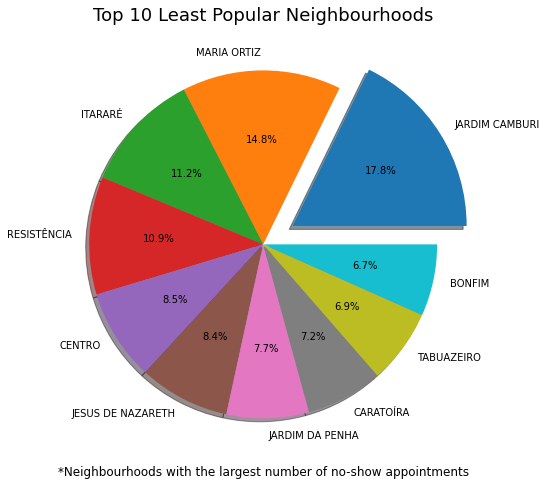

In [64]:
df_noshow.Neighbourhood.value_counts()[:10].plot(kind='pie', 
figsize=(8, 8), autopct=lambda pct: func(pct), explode=[0.2,0,0,0,0,0,0,0,0,0], shadow=True)
plt.title("Top 10 Least Popular Neighbourhoods", fontsize=18)
plt.xlabel("*Neighbourhoods with the largest number of no-show appointments", fontsize=12)
plt.ylabel("");

- This is a representation of the top 10 community with the highest percentage of no-show. Jardim Camburi has the highest percentage  

### Question 6:  What are the top 10 neighbourhoods with the highest percentage of Patients that showed up?

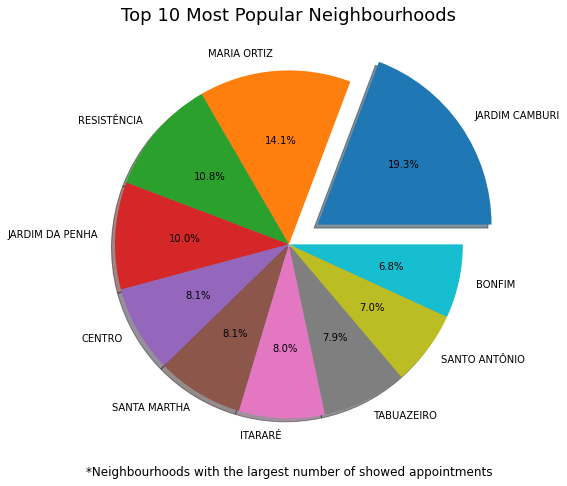

In [65]:
df_show.Neighbourhood.value_counts()[:10].plot(kind='pie', 
figsize=(8, 8), autopct=lambda pct: func(pct), explode=[0.2,0,0,0,0,0,0,0,0,0], shadow=True)
plt.title("Top 10 Most Popular Neighbourhoods", fontsize=18)
plt.xlabel("*Neighbourhoods with the largest number of showed appointments", fontsize=12)
plt.ylabel("");

- This is a representation of the top 10 community with the highest percentage ofpatients that turn up for appointments. Jardim Camburi has the highest percentage  

<a id='conclusion'></a>
## Conclusion

- Nearly half of our dataset conists of female with wider age destribution and some outliers.

- It is obvious that large number of our patients did show up on their appointments and only few of them did not.

- Although females do show up on their appointments more often than male do, but this may be as a result of large number of female patients.
- Large number of our patients did not recieive any SMS reminder of their appointments, yet they showed up on their appointments.
- Having a scholarship does not have any affect for a patient to show up to a doctor appointment.

<a id='limitation'></a>
## Limitation

- The location of the patient was not specified. if a patient is living far away from the hospital, there woyuld be a likelihood of missing an appointment.
- Likewise, reason for the appointment was not specified. This would have given us a better understanding why a patient would miss appointment.